### Analyse De Corrélation :


In [1]:

# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the file
df = pd.read_csv('../data.csv', encoding='latin1')
# print(df.head())
print(df)


                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [3]:
moyenne_annee = df['released_year'].mean()
moyenne_artistes = df['artist_count'].mean()
moyenne_playlists = df['in_spotify_playlists'].mean()

# Afficher les moyennes calculées
print("\nMoyenne de l'année de sortie :", moyenne_annee)
print("Moyenne du nombre d'artistes par chanson :", moyenne_artistes)
print("Moyenne du nombre de playlists Spotify :", moyenne_playlists)


Moyenne de l'année de sortie : 2018.2381951731375
Moyenne du nombre d'artistes par chanson : 1.5561385099685205
Moyenne du nombre de playlists Spotify : 5200.124868835257


In [4]:
# Par exemple, calculons la médiane des colonnes spécifiques
median_annee = df['released_year'].median()
median_artistes = df['artist_count'].median()
median_playlists = df['in_spotify_playlists'].median()

# Calculer l'écart type des colonnes spécifiques
std_annee = df['released_year'].std()
std_artistes = df['artist_count'].std()
std_playlists = df['in_spotify_playlists'].std()

# Afficher les résultats
print("\nMédiane de l'année de sortie :", median_annee)
print("Médiane du nombre d'artistes par chanson :", median_artistes)
print("Médiane du nombre de playlists Spotify :", median_playlists)
print("\nÉcart type de l'année de sortie :", std_annee)
print("Écart type du nombre d'artistes par chanson :", std_artistes)
print("Écart type du nombre de playlists Spotify :", std_playlists)


Médiane de l'année de sortie : 2022.0
Médiane du nombre d'artistes par chanson : 1.0
Médiane du nombre de playlists Spotify : 2224.0

Écart type de l'année de sortie : 11.116218075505877
Écart type du nombre d'artistes par chanson : 0.8930441928452748
Écart type du nombre de playlists Spotify : 7897.608990375098


In [5]:
# Afficher les types de données de chaque colonne
print(df.dtypes)

# Examiner les valeurs uniques dans chaque colonne
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

# Convertir les colonnes appropriées en type numérique
numeric_columns = ['in_spotify_playlists', 'in_spotify_charts', 'streams',
                'in_apple_playlists', 'in_apple_charts',
                'in_deezer_playlists', 'in_deezer_charts',
                'in_shazam_charts']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Réessayer l'agrégation et le tri
df['total_popularity'] = df[numeric_columns].sum(axis=1)
sorted_data = df.sort_values(by='total_popularity', ascending=False)
print(sorted_data[['track_name', 'artist(s)_name', 'total_popularity']].head(10))


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object
Unique values in track_name: ['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Flowers' 'Daylight'
 'As It W

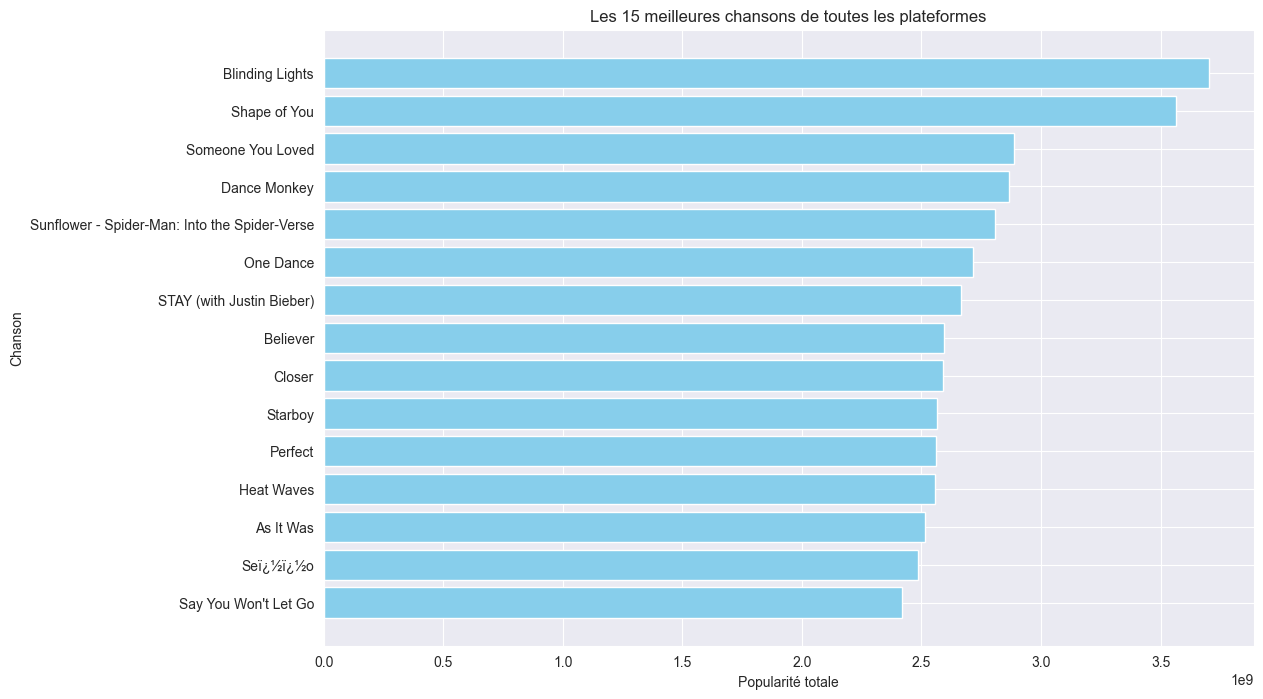

In [6]:
# Agréger les mesures de popularité pour chaque chanson
df['total_popularity'] = df[['in_spotify_playlists', 'in_spotify_charts', 'streams',
                                'in_apple_playlists', 'in_apple_charts',
                                'in_deezer_playlists', 'in_deezer_charts',
                                'in_shazam_charts']].sum(axis=1)

# Trier les chansons par popularité totale
sorted_data = df.sort_values(by='total_popularity', ascending=False)

# Sélectionner les 15 meilleures chansons
top_15_songs = sorted_data[['track_name', 'artist(s)_name', 'total_popularity']].head(15)

# Créer le graphique
plt.figure(figsize=(12, 8))
plt.barh(top_15_songs['track_name'], top_15_songs['total_popularity'], color='skyblue')
plt.xlabel('Popularité totale')
plt.ylabel('Chanson')
plt.title('Les 15 meilleures chansons de toutes les plateformes')
plt.gca().invert_yaxis()  # Inverser l'axe y pour que la chanson la plus populaire soit en haut

# Afficher le graphique
plt.show()

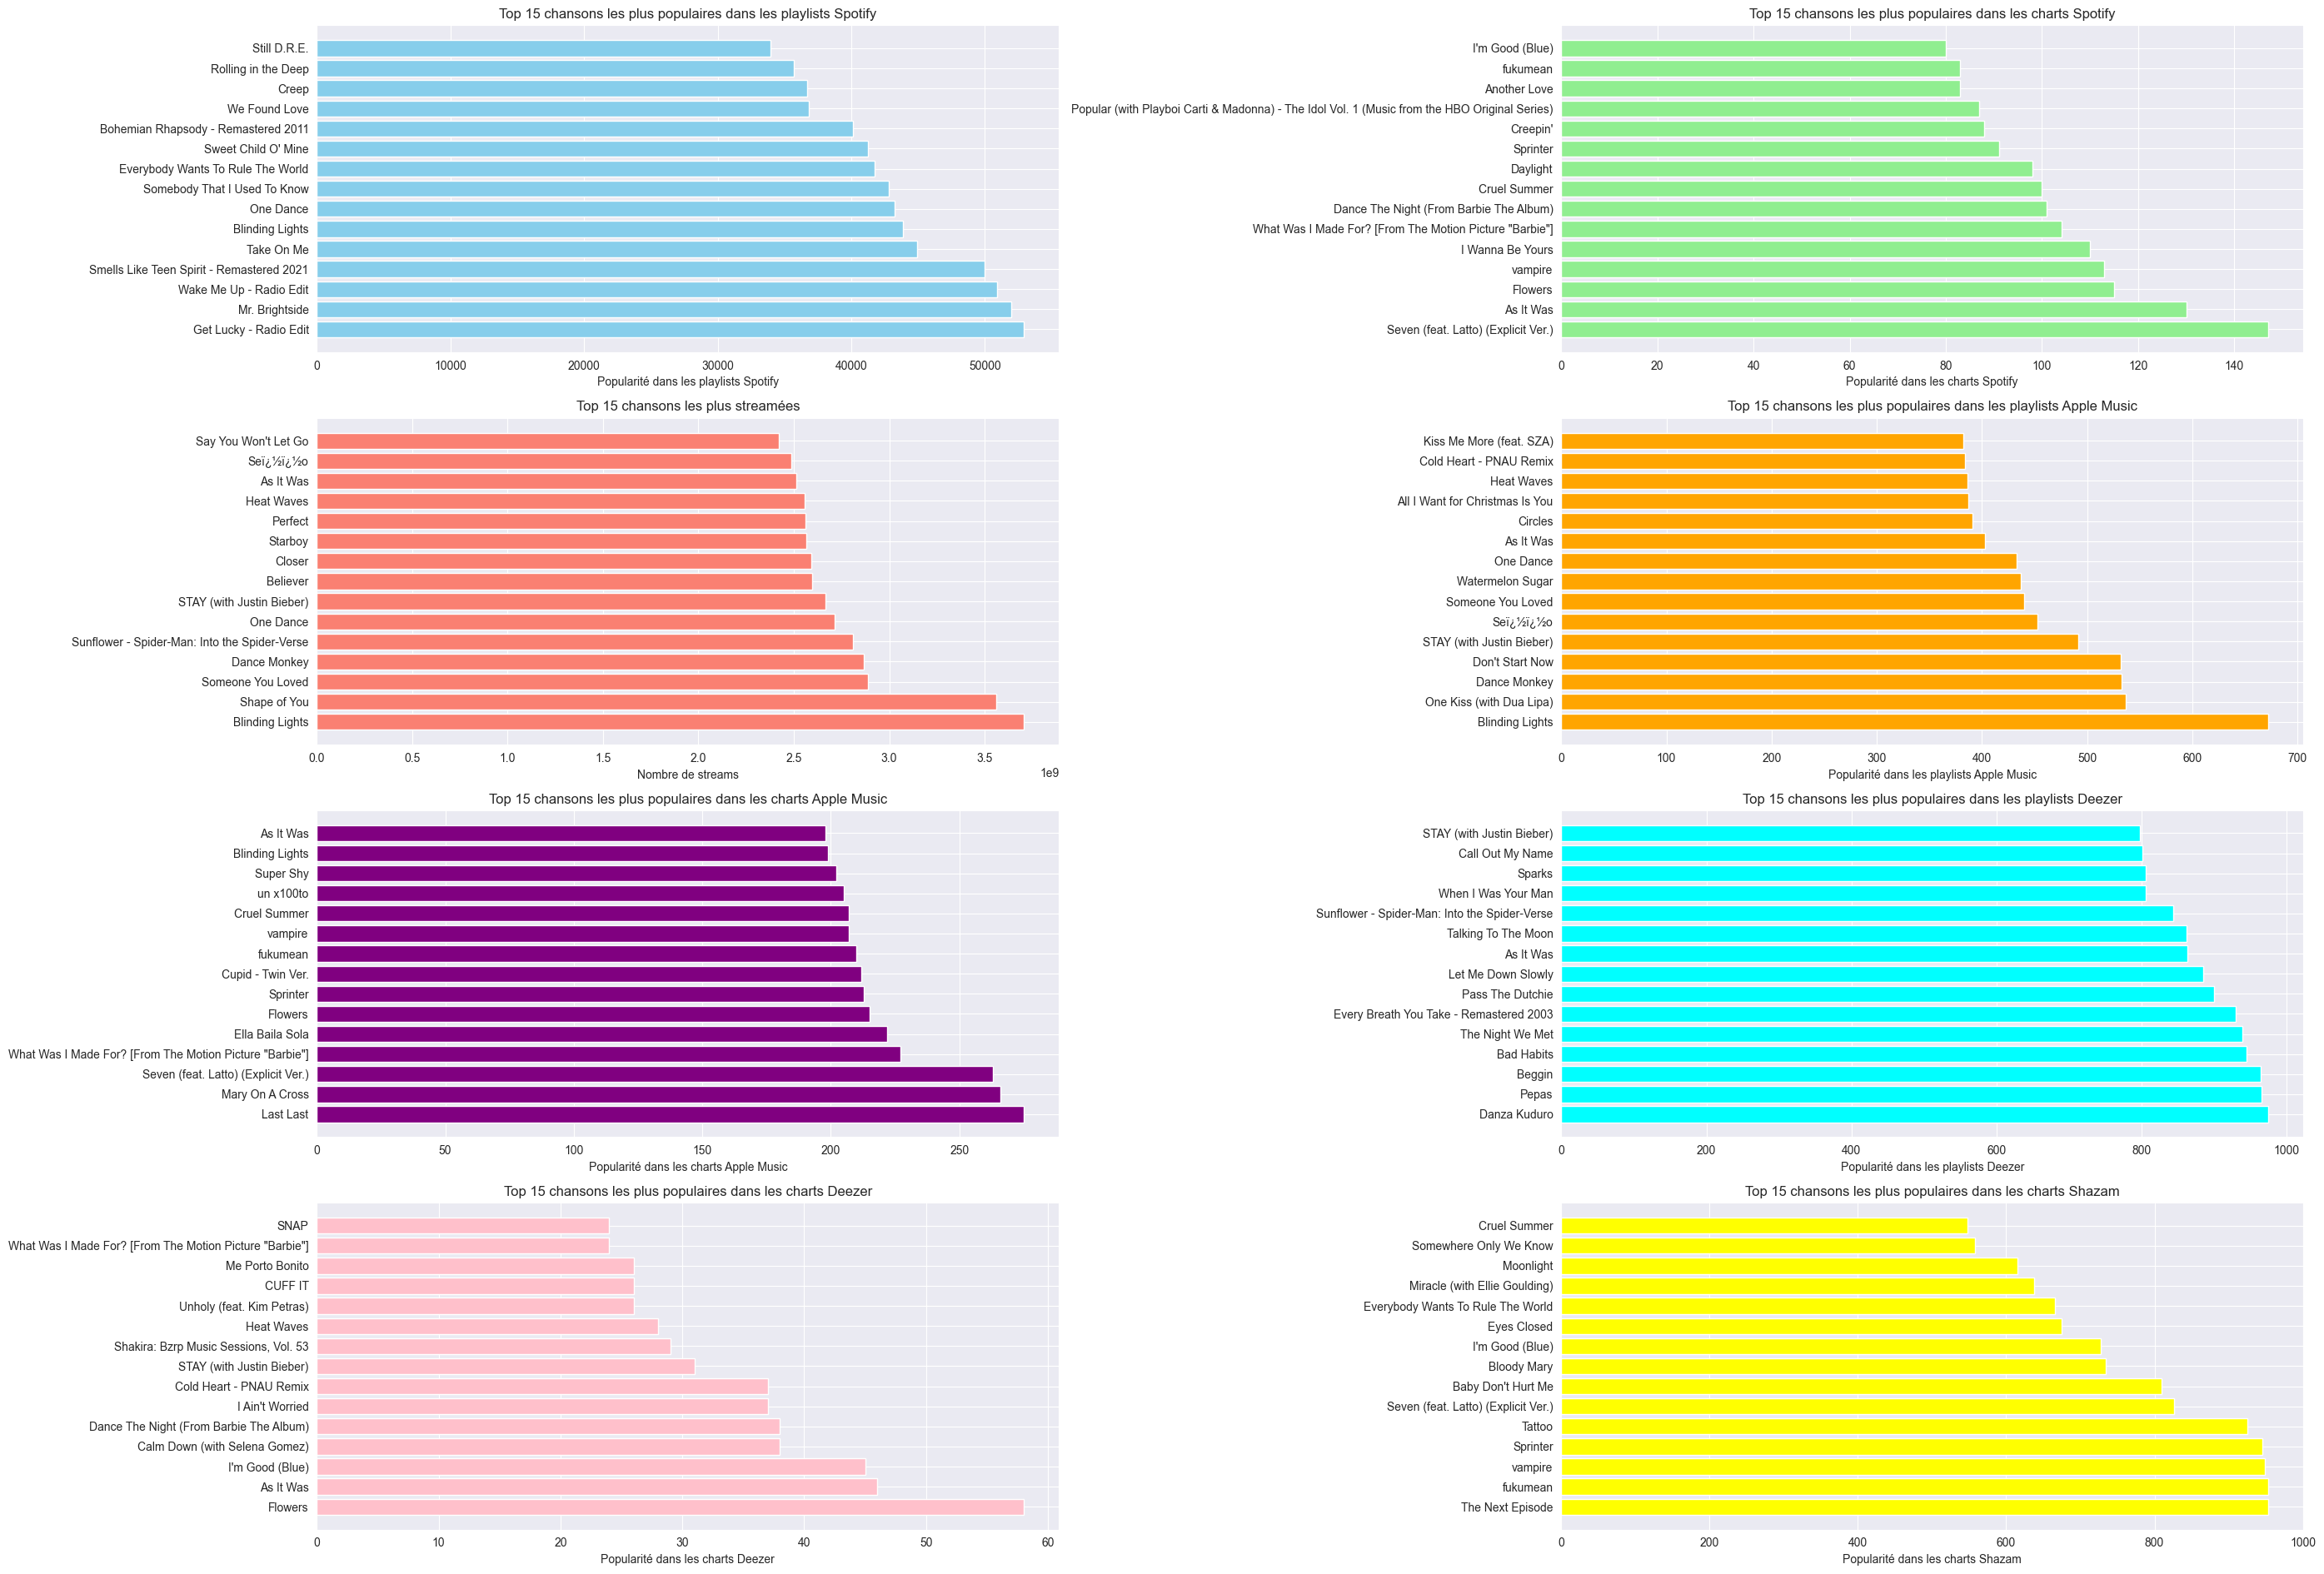

In [7]:
# Trier les données par chaque mesure de popularité
sorted_by_spotify_playlists = df.sort_values(by='in_spotify_playlists', ascending=False).head(15)
sorted_by_spotify_charts = df.sort_values(by='in_spotify_charts', ascending=False).head(15)
sorted_by_streams = df.sort_values(by='streams', ascending=False).head(15)
sorted_by_apple_playlists = df.sort_values(by='in_apple_playlists', ascending=False).head(15)
sorted_by_apple_charts = df.sort_values(by='in_apple_charts', ascending=False).head(15)
sorted_by_deezer_playlists = df.sort_values(by='in_deezer_playlists', ascending=False).head(15)
sorted_by_deezer_charts = df.sort_values(by='in_deezer_charts', ascending=False).head(15)
sorted_by_shazam_charts = df.sort_values(by='in_shazam_charts', ascending=False).head(15)

# Visualisation de la popularité des chansons sur chaque plateforme
plt.figure(figsize=(28, 19))

plt.subplot(4, 2, 1)
plt.barh(sorted_by_spotify_playlists['track_name'], sorted_by_spotify_playlists['in_spotify_playlists'], color='skyblue')
plt.xlabel('Popularité dans les playlists Spotify')
plt.title('Top 15 chansons les plus populaires dans les playlists Spotify')

plt.subplot(4, 2, 2)
plt.barh(sorted_by_spotify_charts['track_name'], sorted_by_spotify_charts['in_spotify_charts'], color='lightgreen')
plt.xlabel('Popularité dans les charts Spotify')
plt.title('Top 15 chansons les plus populaires dans les charts Spotify')

plt.subplot(4, 2, 3)
plt.barh(sorted_by_streams['track_name'], sorted_by_streams['streams'], color='salmon')
plt.xlabel('Nombre de streams')
plt.title('Top 15 chansons les plus streamées')

plt.subplot(4, 2, 4)
plt.barh(sorted_by_apple_playlists['track_name'], sorted_by_apple_playlists['in_apple_playlists'], color='orange')
plt.xlabel('Popularité dans les playlists Apple Music')
plt.title('Top 15 chansons les plus populaires dans les playlists Apple Music')

plt.subplot(4, 2, 5)
plt.barh(sorted_by_apple_charts['track_name'], sorted_by_apple_charts['in_apple_charts'], color='purple')
plt.xlabel('Popularité dans les charts Apple Music')
plt.title('Top 15 chansons les plus populaires dans les charts Apple Music')

plt.subplot(4, 2, 6)
plt.barh(sorted_by_deezer_playlists['track_name'], sorted_by_deezer_playlists['in_deezer_playlists'], color='cyan')
plt.xlabel('Popularité dans les playlists Deezer')
plt.title('Top 15 chansons les plus populaires dans les playlists Deezer')

plt.subplot(4, 2, 7)
plt.barh(sorted_by_deezer_charts['track_name'], sorted_by_deezer_charts['in_deezer_charts'], color='pink')
plt.xlabel('Popularité dans les charts Deezer')
plt.title('Top 15 chansons les plus populaires dans les charts Deezer')

plt.subplot(4, 2, 8)
plt.barh(sorted_by_shazam_charts['track_name'], sorted_by_shazam_charts['in_shazam_charts'], color='yellow')
plt.xlabel('Popularité dans les charts Shazam')
plt.title('Top 15 chansons les plus populaires dans les charts Shazam')

plt.tight_layout()
plt.show()
